## Unknown Phase

### Signal Modelling

In radio communications and radar systems, estimating the **phase** of received signals is crucial for tasks like coherent detection, where the exact phase relationship between the transmitted and received signals is used to decode information.

However, accurately estimating the phase can be challenging due to:
- **Randomness in Phase:** The phase of the received signal may vary unpredictably.
- **Noise:** Additive noise can obscure the phase information, making accurate estimation computationally intensive.
- **Hardware Limitations:** High-precision phase estimation requires sophisticated and expensive hardware.

**Alternative Detection Schemes**

Given the challenges in phase estimation, engineers and researchers seek detection methods that circumvent the need to know the exact phase of the received signal. 

These methods ensure reliable communication or detection without the added complexity and cost of phase estimation. 

Examples include:
- **Non-Coherent Detection:** Relies on signal envelope or energy rather than phase.
- **Differential Encoding:** Encodes information in phase differences between successive symbols rather than absolute phase.

#### Signal Representation with Random Phase

Since we are focusing on a random phase, the received signal

$$
y(t) = \alpha a_i(t - t_0) e^{j \left( 2 \pi (f_i + f_d)(t - t_0) + \phi_i(t - t_0) + \beta \right)} + z(t),
$$

can be re-expressed as

$$
y(t) = \alpha a_i(t - t_0)e^{j2\pi(f_i+f_d)(t-t_0)+\phi_i(t-t_0)+\beta_i)} + z(t)
$$

where

- **$ \alpha $:** Amplitude scaling factor.
- **$ a_i(t - t_0) $:** Time-varying amplitude modulation function for hypothesis $ H_i $ with a delay $ t_0 $.
- **$ 2\pi(f_i + f_d)(t - t_0) $:** Carrier frequency $ f_i $ plus Doppler shift $ f_d $, accounting for the delay $ t_0 $.
- **$ \phi_i(t - t_0) $:** Phase modulation component, potentially time-varying.
- **$ \beta $:** Unknown phase offset.
- **$ z(t) $:** Additive noise, typically modeled as complex Gaussian noise.

The re-expression introduces $ \beta_i $ to denote the unknown phase for hypothesis $ H_i $. 

This makes it clear that the phase offset is specific to each hypothesis.


**Simplifying Signal Modelling**

We simplify the signal model to reduce complexity without affecting the generality of the analysis. 

We let:
- $ f_d = 0 $: to remove the Doppler shift from the equation, focusing solely on the carrier frequency $ f_i $. 
  
- $ t_0 = 0 $: to remove the initial delay, simplifying the time variable to start at zero. 

**Discrete Sampling of the Received Signal**


Next, the continuous-time signal $ y(t) $ is sampled at discrete time instances $ t_j $ to obtain $ k $ complex samples $ y_j $.

The $ j $-th sample under hypothesis $ H_i $ can be written as

$$
\begin{align*}
y_j &= \alpha a_i(t_j)e^{j[2\pi f_i t_j + \phi_i(t_j) + \beta_i]} + z_j \\
&= \alpha u_{ij} e^{j \beta_i} + z_j
\end{align*}
$$

where $ i = 0, 1, \quad j = 1, \ldots, k $, and

$$
u_{ij} = a_i(t_j)e^{j(2\pi f_i t_j + \phi_i(t_j))}
$$


- **Time Instances:** $ t_j $ for $ j = 1, \ldots, k $ represent the discrete times at which the signal is sampled within the duration $ T $.
- **Signal Sample:** Each sample $ y_j $ under hypothesis $ H_i $ is expressed as a combination of the signal component and noise.

**Vector Notation for Samples**


To handle $ k $ samples collectively, it's convenient to use vector notation. 

We can write the column vector $ \vec{y} $ as

$$
\vec{y} = \alpha \vec{u}_i e^{j \beta_i} + \vec{z}
$$

Note that 
- **$ \vec{y} $:** A $ k \times 1 $ column vector containing all received samples $ y_j $ for $ j = 1, \ldots, k $.
- **$ \vec{u}_i $:** A $ k \times 1 $ column vector where each element $ u_{ij} $ corresponds to the known signal component under hypothesis $ H_i $.
- **$ \vec{z} $:** A $ k \times 1 $ column vector representing the noise across all samples.

### Conditional Density Functions

If the noise is zero mean and white, with a correlation matrix of $ \sigma_z^2 I $, where $ I $ is a $ k \times k $ identity matrix.

Recall that $\sigma_z^2 = 2 \sigma^2$.


The conditional density functions are

$$
p_0(\vec{y}|\beta_0) = \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} [\vec{y} - \alpha \vec{u}_0 e^{j\beta_0}]^T [\vec{y}^* - \alpha \vec{u}_0^* e^{-j\beta_0}] \right)
$$

and

$$
p_1(\vec{y}|\beta_1) = \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} [\vec{y} - \alpha \vec{u}_1 e^{j\beta_1}]^T [\vec{y}^* - \alpha \vec{u}_1^* e^{-j\beta_1}] \right)
$$

Each of which can be written as

$$
\boxed{
\begin{align*}
p_i(\vec{y} | \beta_i) &= \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \\
&\qquad\times \exp \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \cos(\beta_i - \xi_i) \right) \\
&\qquad\times \exp \left( -\frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{ij}|^2 \right), \quad i = 0, 1
\end{align*}
}
$$

where 
- $ \left| \sum_{j=1}^k y_j u_{ij}^* \right| $ is the magnitude 
- $ \xi_i $ is the phase of the dot product of $ \vec{y} $ and $ \vec{u}_i^* $.


### Conditional Probabilities

We aim to derive the conditional probability density functions (pdfs) of the received signal vector $ \vec{y} $ under two different hypotheses $ H_0 $ and $ H_1 $. 

Our goal is to derive the conditional pdfs $ p_i(\vec{y} | \beta_i) $ for $ i = 0, 1 $.

**Assumptions**

If the noise is zero mean and white, with a correlation matrix of $ \sigma_z^2 I $, where $ I $ is a $ k \times k $ identity matrix.

- Zero Mean: $ \mathbb{E}[\vec{z}] = \vec{0} $.
- White Noise: The noise is uncorrelated across different samples.
- Correlation Matrix (Covariance Matrix): $ \mathbb{E}[\vec{z} \vec{z}^H] = \sigma_z^2 I $, where $ I $ is the $ k \times k $ identity matrix.

Note that $ \sigma_z^2 = 2 \sigma^2 $, which accounts for the variance in both the real and imaginary parts of the noise.

Under each hypothesis $ H_i $, the received signal vector $ \vec{y} $ is composed of a deterministic signal component $ \alpha \vec{u}_i e^{j \beta_i} $ plus the stochastic noise $ \vec{z} $.


Since $ \vec{z} $ is complex Gaussian with zero mean and covariance $ \sigma_z^2 I $, $ \vec{y} $ conditioned on $ \beta_i $ under hypothesis $ H_i $ is also complex Gaussian with mean $ \alpha \vec{u}_i e^{j \beta_i} $ and covariance $ \sigma_z^2 I $. 

Thus, the conditional pdf $ p_i(\vec{y} | \beta_i) $ is given by:

$$
p_i(\vec{y} | \beta_i) = \frac{1}{(2\pi \sigma_z^2)^k} \exp\left( -\frac{1}{2 \sigma_z^2} \|\vec{y} - \alpha \vec{u}_i e^{j \beta_i}\|^2 \right)
$$

**Note**: 
- The factor $ (2\pi \sigma_z^2)^k $ in the denominator, which is commonly used when considering both real and imaginary parts separately. 
- The factor $ \frac{1}{2} $ is included to account for the fact that $ \sigma_z^2 $ represents the variance per complex dimension (both real and imaginary parts).

The squared norm $ \|\vec{y} - \alpha \vec{u}_i e^{j \beta_i}\|^2 $ can be expanded as:

$$
\|\vec{y} - \alpha \vec{u}_i e^{j \beta_i}\|^2 = (\vec{y} - \alpha \vec{u}_i e^{j \beta_i})^H (\vec{y} - \alpha \vec{u}_i e^{j \beta_i})
$$

Alternatively, the conditional density functions can be expressed as

$$
p_0(\vec{y}|\beta_0) = \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} [\vec{y} - \alpha \vec{u}_0 e^{j\beta_0}]^T [\vec{y}^* - \alpha \vec{u}_0^* e^{-j\beta_0}] \right)
$$

and

$$
p_1(\vec{y}|\beta_1) = \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} [\vec{y} - \alpha \vec{u}_1 e^{j\beta_1}]^T [\vec{y}^* - \alpha \vec{u}_1^* e^{-j\beta_1}] \right)
$$


**Simplifying**

Breaking the norm down:

$$
\begin{align*}
(\vec{y} - \alpha \vec{u}_i e^{j \beta_i})^H (\vec{y} - \alpha \vec{u}_i e^{j \beta_i}) &= \vec{y}^H \vec{y} - \alpha e^{-j \beta_i} \vec{y}^H \vec{u}_i - \alpha e^{j \beta_i} \vec{u}_i^H \vec{y} + \alpha^2 \vec{u}_i^H \vec{u}_i \\
&= \sum_{j=1}^k |y_j|^2 - \alpha e^{-j \beta_i} \sum_{j=1}^k y_j^* u_{ij} - \alpha e^{j \beta_i} \sum_{j=1}^k u_{ij}^* y_j + \alpha^2 \sum_{j=1}^k |u_{ij}|^2
\end{align*}
$$

where 

- $ \vec{y}^H \vec{y} = \sum_{j=1}^k |y_j|^2 $: Sum of squared magnitudes of the received samples.
- $ \vec{y}^H \vec{u}_i = \sum_{j=1}^k y_j^* u_{ij} $: Inner product between $ \vec{y} $ and $ \vec{u}_i $.
- $ \vec{u}_i^H \vec{u}_i = \sum_{j=1}^k |u_{ij}|^2 $: Sum of squared magnitudes of the known signal components.


Substituting the expanded norm back into the conditional pdf:

$$
p_i(\vec{y} | \beta_i) = \frac{1}{(2\pi \sigma_z^2)^k} \exp\left( -\frac{1}{2 \sigma_z^2} \left[ \sum_{j=1}^k |y_j|^2 - \alpha e^{-j \beta_i} \sum_{j=1}^k y_j^* u_{ij} - \alpha e^{j \beta_i} \sum_{j=1}^k u_{ij}^* y_j + \alpha^2 \sum_{j=1}^k |u_{ij}|^2 \right] \right)
$$



**Simplifying the Exponential Term**

We can rearrange the terms inside the exponential to separate the components that depend on $ \beta_i $ from those that don't:

$$
\begin{align*}
& -\frac{1}{2 \sigma_z^2} \left[ \sum_{j=1}^k |y_j|^2 + \alpha^2 \sum_{j=1}^k |u_{ij}|^2 \right] \\
& + \frac{\alpha}{2 \sigma_z^2} \left[ e^{-j \beta_i} \sum_{j=1}^k y_j^* u_{ij} + e^{j \beta_i} \sum_{j=1}^k u_{ij}^* y_j \right]
\end{align*}
$$

Notice that the first bracketed term is real and independent of $ \beta_i $, while the second bracketed term involves $ \beta_i $.

**Expressing in Terms of Magnitude and Phase**

We denote:

$$
\sum_{j=1}^k y_j u_{ij}^* = R_i e^{-j \xi_i}
$$

where:
- $ R_i = \left| \sum_{j=1}^k y_j u_{ij}^* \right| $: Magnitude of the inner product.
- $ \xi_i = \angle\left( \sum_{j=1}^k y_j u_{ij}^* \right) $: Phase angle of the inner product.

Then, its complex conjugate is:

$$
\sum_{j=1}^k y_j^* u_{ij} = R_i e^{j \xi_i}
$$

Substituting these into the exponential term:


Certainly. Here is the simplification in one equation:

$$
\begin{align*}
\frac{\alpha}{2 \sigma_z^2} \left[ e^{-j \beta_i} R_i e^{-j \xi_i} + e^{j \beta_i} R_i e^{j \xi_i} \right] &= \frac{\alpha R_i}{2 \sigma_z^2} \left[ e^{-j (\beta_i - \xi_i)} + e^{j (\beta_i - \xi_i)} \right] \\
&= \frac{\alpha R_i}{2 \sigma_z^2} \cdot 2 \cos(\beta_i - \xi_i) \\
&= \frac{\alpha R_i}{\sigma_z^2} \cos(\beta_i - \xi_i)
\end{align*}
$$

Combining all the simplified terms, the conditional pdf becomes:

$$
\boxed{
\begin{align*}
p_i(\vec{y} | \beta_i) &= \frac{1}{(2\pi \sigma_z^2)^k} \exp\left( -\frac{1}{2 \sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \\
&\quad \times \exp\left( \frac{\alpha}{\sigma_z^2} R_i \cos(\beta_i - \xi_i) \right) \\
&\quad \times \exp\left( -\frac{\alpha^2}{2 \sigma_z^2} \sum_{j=1}^k |u_{ij}|^2 \right)
\end{align*}
}
$$

where $ R_i = \left| \sum_{j=1}^k y_j u_{ij}^* \right| $ is the magnitude.

Specifically:

$$
\begin{align*}
p_0(\vec{y}|\beta_0) &= \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \\
&\quad \times \exp \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{0j}^* \right| \cos(\beta_0 - \xi_0) \right) \\
&\quad \times \exp \left( -\frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{0j}|^2 \right) \\
\\
p_1(\vec{y}|\beta_1) &= \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \\
&\quad \times \exp \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{1j}^* \right| \cos(\beta_1 - \xi_1) \right) \\
&\quad \times \exp \left( -\frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{1j}|^2 \right)
\end{align*}
$$

where:
- $ u_{ij} $ is the $ j $-th component of the known signal vector $ \vec{u}_i $ under hypothesis $ H_i $.
- $ \xi_i = \arg\left( \sum_{j=1}^k y_j u_{ij}^* \right) $.

### Uniform Distribution for $ \beta_i $

When designing detection schemes, any prior information about the unknown parameters can significantly influence the approach. In the absence of specific information about the phase $ \beta_i $, we must rely on **reasonable and justifiable assumptions** to proceed.

One fundamental principle in statistics and information theory is the **Maximum Entropy Principle**, which states that, subject to known constraints, the probability distribution which best represents the current state of knowledge is the one with the largest entropy.

Without any additional information about $ \beta_i $, the **uniform distribution** maximizes entropy, implying maximum uncertainty. 

The phase $ \beta_i $ inherently has a **circular** nature, meaning that $ \beta_i $ and $ \beta_i + 2\pi $ represent the same physical state. 

Assuming a uniform distribution simplifies mathematical derivations and computations in detection schemes.


Given the reasons above, we define the probability density function (pdf) of the unknown phase $ \beta_i $ as:

$$
\boxed{
p(\beta_i) = \frac{1}{2\pi}, \quad 0 \le \beta_i < 2\pi
}
$$

Note that:
- **$ \frac{1}{2\pi} $**: Constant value ensuring that the total probability over the interval $ (0, 2\pi) $ is 1.
  
  $$
  \int_{0}^{2\pi} p(\beta_i) \, d\beta_i = \int_{0}^{2\pi} \frac{1}{2\pi} \, d\beta_i = 1
  $$
  
- **$ 0 \le \beta_i < 2\pi $**: Specifies the domain of $ \beta_i $, acknowledging the periodicity of the phase.



### Expressing in Terms of Bessel function

**Express the Unconditional PDF as an Integral Over $ \beta_i $**

Starting with the definition of the unconditional pdf:

$$
p_i(\vec{y}) = \int_{0}^{2\pi} p_i(\vec{y} | \beta_i) p(\beta_i) \, d\beta_i
$$

Given that $ p(\beta_i) = \frac{1}{2\pi} $, we substitute:

$$
p_i(\vec{y}) = \frac{1}{2\pi} \int_{0}^{2\pi} p_i(\vec{y} | \beta_i) \, d\beta_i
$$

Insert the expression for $ p_i(\vec{y} | \beta_i) $:

$$
\begin{align*}
p_i(\vec{y}) &= \frac{1}{2\pi} \int_{0}^{2\pi} \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \\
&\quad \times \exp \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \cos(\beta_i - \xi_i) \right) \\
&\quad \times \exp \left( -\frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{ij}|^2 \right) d\beta_i
\end{align*}
$$

Observe that several terms inside the integral do not depend on $ \beta_i $, which can be factored out:

$$
\begin{align*}
p_i(\vec{y}) &= \frac{1}{2\pi} \cdot \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \exp \left( -\frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{ij}|^2 \right) \\
&\quad \times \int_{0}^{2\pi} \exp \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \cos(\beta_i - \xi_i) \right) d\beta_i
\end{align*}
$$

**Recognize the Integral as a Modified Bessel Function**

The integral in the expression is of the form:

$$
\int_{0}^{2\pi} \exp \left( x \cos(\theta) \right) d\theta = 2\pi I_0(x)
$$

where:
- $ x = \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| $
- $ \theta = \beta_i - \xi_i $

Thus, substituting $ x $ and recognizing the integral:

$$
\int_{0}^{2\pi} \exp \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \cos(\beta_i - \xi_i) \right) d\beta_i = 2\pi I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \right)
$$

Plug the result of the integral back into the expression for $ p_i(\vec{y}) $:

$$
\begin{align*}
p_i(\vec{y}) &= \frac{1}{2\pi} \cdot \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \exp \left( -\frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{ij}|^2 \right) \\
&\quad \times 2\pi I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \right)
\end{align*}
$$

**Simplify the Expression**

Cancel out the $ 2\pi $ terms:

$$
\frac{1}{2\pi} \times 2\pi = 1
$$

Thus:

$$
p_i(\vec{y}) = \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \exp \left( -\frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{ij}|^2 \right) I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \right)
$$

Hence, the **unconditional pdf** $ p_i(\vec{y}) $ under hypothesis $ H_i $ is:

$$
\boxed{
\begin{align*}
p_i(\vec{y}) &= \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \\
&\quad \times I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \right) \\
&\quad \times \exp \left( -\frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{ij}|^2 \right), \quad i = 0, 1
\end{align*}
}
$$

where $ I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \right) $ is the modified Bessel function of the first kind of order zero.

##### The Modified Bessel Function $ I_0(x) $

The modified Bessel function of the first kind of order zero, $ I_0(x) $, is defined as:

$$
I_0(x) = \frac{1}{2\pi} \int_{0}^{2\pi} e^{x \cos(\theta)} \, d\theta
$$
where $ \theta $ is a dummy variable representing the angle.

**Properties Relevant to Detection**

- **Positive Definiteness**: $ I_0(x) $ is always positive for real $ x $, which ensures the unconditional pdf remains valid.
- **Monotonicity**: $ I_0(x) $ is monotonically increasing for $ x \geq 0 $, meaning higher inner product magnitudes lead to higher likelihoods.
- **Asymptotic Behavior**:
   - For small $ x $, $ I_0(x) \approx 1 + \frac{x^2}{4} $.
   - For large $ x $, $ I_0(x) \approx \frac{e^x}{\sqrt{2\pi x}} $.


### Likelihook Ratio

From these density functions, the log-likelihood ratio is

$$
\begin{align*}
\ell(\vec{y}) &= \ln L(\vec{y}) \\
&= \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{1j}^* \right| \right) - \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{0j}^* \right| \right) \\
&\qquad- \frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{1j}|^2  + \frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{0j}|^2 \\
&= U_1 - U_0
\end{align*}
$$

where

$$
U_i = \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \right) - \frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{ij}|^2, \quad i = 0, 1
$$

### Log-Likelihood Ratio (LLR)

Note that we use the **unconditional PDF** $p_i(\vec{y})$, instead of the conditional PDF (likelihood) $p_i(\vec{y} | \beta_i)$, because we already assume that $\beta_i$ is uniform.

The **Likelihood Ratio (LR)** is defined as:

$$
L(\vec{y}) = \frac{p_1(\vec{y})}{p_0(\vec{y})}
$$

The **Log-Likelihood Ratio (LLR)** is thus:

$$
\ell(\vec{y}) = \ln L(\vec{y}) = \ln \left( \frac{p_1(\vec{y})}{p_0(\vec{y})} \right) = \ln p_1(\vec{y}) - \ln p_0(\vec{y})
$$

Using the expressions for $ p_1(\vec{y}) $ and $ p_0(\vec{y}) $, we substitute them into the LLR:

$$
\begin{align*}
\ell(\vec{y}) &= \ln \left[ \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \times I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{1j}^* \right| \right) \times \exp \left( -\frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{1j}|^2 \right) \right] \\
&\quad - \ln \left[ \frac{1}{(2\pi\sigma_z^2)^k} \exp \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \times I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{0j}^* \right| \right) \times \exp \left( -\frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{0j}|^2 \right) \right]
\end{align*}
$$

**Simplifying the Logarithms**

The logarithm of a product is the sum of logarithms, and constants cancel out. Applying this property:

$$
\begin{align*}
\ell(\vec{y}) &= \ln \left( \frac{1}{(2\pi\sigma_z^2)^k} \right) + \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \\
&\quad+ \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{1j}^* \right| \right) + \left( -\frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{1j}|^2 \right) \\
&\quad - \Bigg[ \ln \left( \frac{1}{(2\pi\sigma_z^2)^k} \right) + \left( -\frac{1}{2\sigma_z^2} \sum_{j=1}^k |y_j|^2 \right) \\
&\quad+ \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{0j}^* \right| \right) + \left( -\frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{0j}|^2 \right) \Bigg] \\
&= \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{1j}^* \right| \right) - \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{0j}^* \right| \right) \\
&\quad - \frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{1j}|^2 + \frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{0j}|^2
\end{align*}
$$

Thus, we have

$$
\boxed{
\begin{align*}
\ell(\vec{y})
&= \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{1j}^* \right| \right) - \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{0j}^* \right| \right) \\
&\qquad- \frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{1j}|^2  + \frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{0j}|^2
\end{align*}
}
$$

#### Decision Variable $ U_i $

We define the decision variable as

$$
\boxed{
\begin{align*}
U_i = \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \right) - \frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{ij}|^2, \quad i = 0, 1
\end{align*}
}
$$

Thus, the LLR becomes:

$$
\ell(\vec{y}) = U_1 - U_0
$$

#### Decision Rule Based on LLR

We have

$$
\ell(\vec{y}) = \ln \left( \frac{p_1(\vec{y})}{p_0(\vec{y})} \right) \gtrless \eta_L
$$


#### Simplification Under Equal Energy

When both hypotheses $ H_0 $ and $ H_1 $ involve signals of **equal energy**, certain terms in the LLR become constant and thus irrelevant for the decision-making process.

**Equal Energy Assumption**

We have

$$
\sum_{j=1}^k |u_{1j}|^2 = \sum_{j=1}^k |u_{0j}|^2
$$

The energy terms $ \frac{\alpha^2}{2\sigma_z^2} \sum |u_{ij}|^2 $ for $ i = 0, 1 $ cancel out or remain constant relative to each other, thus not affecting the relative likelihoods.

Under the equal energy assumption, the decision variables $ U_i $ simplify to:

$$
U_i = \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=1}^k y_j u_{ij}^* \right| \right), \quad i = 0, 1
$$

Additionally, the scalar factor $ \frac{\alpha^2}{\sigma_z^2} $ does not affect the **decision boundary** since it is a constant multiplier for both hypotheses. Therefore, it can be safely ignored when comparing $ U_1 $ and $ U_0 $.

Under equal energy and ignoring scalar constants, the decision variables simplify further to:

$$
\boxed{
U_i = \left| \sum_{j=1}^k y_j u_{ij}^* \right|, \quad i = 0, 1
}
$$

So, one can observe that:
- The LLR depends primarily on the **magnitude** of the inner product between the received signal $ \vec{y} $ and each known signal $ \vec{u}_i $.
- The phase information, encapsulated within the Bessel function $ I_0 $, is accounted for by the uniform distribution assumption and the nature of $ I_0 $.


### Noncoherent Receiver Structure

We can now draw a general functional block diagram of the optimal receiver structure as shown in Figure 6.3. 

Because of the lack of phase knowledge, this receiver is referred to as **noncoherent**.

![](fig_6_3.png)

- The receiver first correlates the received signal $ \vec{y} $ with each of the locally generated signals $ \vec{u}_0^* $ and $ \vec{u}_1^* $. 

- The magnitude of each correlation is determined and scaled by the term $ \alpha / \sigma_z^2 $. 

- The resultant scaled magnitude is then processed by a nonlinear transformation, corresponding to $ \ln I_0(\cdot) $.
- Finally a bias term is subtracted from each branch. 

The bias term is

$$
\frac{\alpha^2}{2\sigma_z^2} \sum_{j=1}^k |u_{ij}|^2 = \frac{\alpha^2 \mathcal{E}_i}{\sigma_z^2}
$$

If both signals have equal energy, then the two bias terms are equal and can be eliminated from the receiver. 

Furthermore, the nonlinear transformation is monotonic, so in the case of equal-energy signals, this nonlinear device need not be implemented. 

These simplifications result in the **noncoherent receiver structure** of Figure 6.4.

![Fig 6.4](./Figures/fig_6_4.png)

#### Nonlinearity


In the general case, represented by Figure 6.3, we must include the nonlinearity. 

A number of points can be made about it:

1. If an optimal noncoherent receiver is built using digital circuitry, then the $ \ln I_0(\cdot) $ function can be approximated by a table look-up.

2. If an optimal noncoherent receiver is built using analog circuitry, whose functional block diagram is shown in Figure 6.6, the $ \ln I_0(\cdot) $ function can be approximated using a circuit containing resistors and diodes.

3. If $ x $ is large, it can be shown that $ \ln I_0(x) \approx x $; thus, a "high-SNR" receiver can be built using a linear approximation.

4. If $ x $ is small, $ \ln I_0(x) \approx x^2 / 4 $, thereby allowing a "low-SNR" receiver to be built using a square-law device. 

![Fig 6.6](./Figures/fig_6_6.png)

Evaluating the performance of noncoherent receivers is, in general, exceedingly difficult. 

Indeed, if the $ \ln I_0(\cdot) $ function is included in the receiver, then no known analytical techniques have been developed to determine the performance. 

If, however, the two hypotheses represent signals of equal energy, the simplified receiver of Figure 6.4 is appropriate and an evaluation of its error-rate performance is possible.


### Error-Rate Performance


Assuming that $ \vec{u}_0 $ is sent.

The **probability of error** $ P_E $ is the probability that the decision rule incorrectly selects $ H_1 $ when $ H_0 $ is true:

$$
P_E = \Pr[U_1 > U_0 | H_0]
$$

For equally likely transmission of $ \vec{u}_0 $ and $ \vec{u}_1 $, $P_E$ is

$$
P_E = \Pr[U_1 > U_0]
$$

#### Rician $U_0$

The received signal, with $ \vec{u}_0 $ sent, is

$$
\vec{y} = \alpha \vec{u}_0 e^{j \beta_0} + \vec{z}
$$

Examining the lower branch of the receiver shown in Figure 6.4 reveals that

$$
\begin{align*}
U_0 &= \left| \sum_{j=1}^k \left( \alpha u_{0j} e^{j \beta_0} + z_j \right) u_{0j}^* \right| \\
&= |2 \alpha \mathcal{E} + \mathcal{N}_0|
\end{align*}
$$

where

$$
\mathcal{N}_0 = \sum_{j=1}^k e^{-j \beta_0} z_j u_{0j}^*
$$

Note that $ \mathcal{N}_0 $ is a complex Gaussian random variable with $ E\{\mathcal{N}_0\} = 0 $ and $ \text{Var} \{\mathcal{N}_0\} = 2\sigma_z^2 \mathcal{E} $, since

$$
E\{z_j z_\ell^*\} = \begin{cases} \sigma_z^2, & j = \ell \\ 0, & \text{otherwise} \end{cases}
$$

Therefore, $ U_0 $ is Rician with pdf

$$
p(U_0) = \frac{U_0}{\sigma_v^2} \exp \left( -\frac{U_0^2 + (2\alpha \mathcal{E})^2}{2\sigma_v^2} \right) I_0 \left( \frac{2\alpha \mathcal{E} U_0}{\sigma_v^2} \right)
$$

where $ \sigma_v^2 = \sigma_z^2 \mathcal{E} $.

### Rician Distribution of $ U_0 $
A particular signal $ \vec{u}_0 $ is transmitted.

The received signal vector $ \vec{y} $ is:
  
$$
\vec{y} = \alpha \vec{u}_0 e^{j \beta_0} + \vec{z}
$$

The decision variable $ U_0 $:

$$
U_0 = \left| \sum_{j=1}^k y_j u_{0j}^* \right|
$$

Given $ \vec{y} = \alpha \vec{u}_0 e^{j \beta_0} + \vec{z} $, we substitute into the expression for $ U_0 $:

$$
\begin{align*}
U_0 &= \left| \sum_{j=1}^k y_j u_{0j}^* \right| \\
&= \left| \sum_{j=1}^k \left( \alpha u_{0j} e^{j \beta_0} + z_j \right) u_{0j}^* \right| \\
&= \left| \alpha \sum_{j=1}^k u_{0j} e^{j \beta_0} u_{0j}^* + \sum_{j=1}^k z_j u_{0j}^* \right|
\end{align*}
$$

**Simplifying the Expression**

Notice that $ u_{0j} e^{j \beta_0} u_{0j}^* $ simplifies as follows:

$$
u_{0j} e^{j \beta_0} u_{0j}^* = e^{j \beta_0} |u_{0j}|^2
$$

Thus, the expression for $ U_0 $ becomes:

$$
U_0 = \left| \alpha e^{j \beta_0} \sum_{j=1}^k |u_{0j}|^2 + \sum_{j=1}^k z_j u_{0j}^* \right|
$$

**Energy $ \mathcal{E} $**

Define the energy $ \mathcal{E} $ of the signal vector $ \vec{u}_0 $ as:

$$
\mathcal{E} = \sum_{j=1}^k |u_{0j}|^2
$$

Therefore, the expression simplifies to:

$$
\boxed{
U_0 = \left| 2 \alpha \mathcal{E} + \mathcal{N}_0 \right|
}
$$

where:

$$
\boxed{
\mathcal{N}_0 = \sum_{j=1}^k e^{-j \beta_0} z_j u_{0j}^*
}
$$

#### Distribution of  $ \mathcal{N}_0 $

We have

$$
\mathcal{N}_0 = \sum_{j=1}^k e^{-j \beta_0} z_j u_{0j}^*
$$


**Mean of $ \mathcal{N}_0 $**

Since $ \vec{z} $ is zero-mean noise, and $ e^{-j \beta_0} $ is a deterministic phase rotation (given $ \beta_0 $), we have:

$$
\mathbb{E}\left[ \mathcal{N}_0 \right] = \sum_{j=1}^k e^{-j \beta_0} \mathbb{E}\left[ z_j \right] u_{0j}^* = 0
$$

**Variance of $ \mathcal{N}_0 $**

To compute $ \text{Var}\left\{ \mathcal{N}_0 \right\} $, we consider the covariance between different noise components. 

Given that $ \vec{z} $ is white noise, noise components are uncorrelated for $ j \neq \ell $:

$$
\mathbb{E}\left[ z_j z_\ell^* \right] = \begin{cases} \sigma_z^2, & j = \ell \\ 0, & j \neq \ell \end{cases}
$$

Therefore:

$$
\text{Var}\left\{ \mathcal{N}_0 \right\} = \mathbb{E}\left[ |\mathcal{N}_0|^2 \right] = \mathbb{E}\left[ \mathcal{N}_0 \mathcal{N}_0^* \right] = \sum_{j=1}^k \sum_{\ell=1}^k e^{-j \beta_0} z_j u_{0j}^* e^{j \beta_0} z_\ell^* u_{0\ell} \mathbb{E}\left[ z_j z_\ell^* \right]
$$

Given the uncorrelated noise:

$$
\text{Var}\left\{ \mathcal{N}_0 \right\} = \sum_{j=1}^k |u_{0j}|^2 \sigma_z^2 = \sigma_z^2 \mathcal{E}
$$

(Recall $ \mathcal{E} = \sum_{j=1}^k |u_{0j}|^2 $)

**Note**: The factor of 2 appears in the user's expression because in complex Gaussian noise, variance is often split between real and imaginary parts. 

Here, since $ \mathcal{N}_0 $ is complex, the total variance includes both components:

$$
\text{Var}\left\{ \mathcal{N}_0 \right\} = 2 \sigma_z^2 \mathcal{E}
$$

This accounts for the variance in both the real and imaginary parts of $ \mathcal{N}_0 $.

**Distribution of $ \mathcal{N}_0 $**:

Given that $ \mathcal{N}_0 $ is a linear combination of Gaussian random variables, it itself is a complex Gaussian random variable with:

$$\boxed{
\mathcal{N}_0 \sim \mathcal{CN}\left(0, 2 \sigma_z^2 \mathcal{E}\right)
}
$$


#### Rician Distribution

A **Rician distribution** describes the magnitude of a complex Gaussian random variable with a non-zero mean. 

It is characterized by two parameters:

- **K-factor ($ K $)**: Ratio of the power in the direct (deterministic) component to the power in the scattered (random) component.

- **Scale Parameter ($ \sigma^2 $)**: Variance of the underlying Gaussian noise.

**PDF of Rician Distribution**

The probability density function of a Rician distributed random variable $ r $ is:

$$
p(r; K, \sigma^2) = \frac{r}{\sigma^2} \exp\left( -\frac{r^2 + s^2}{2\sigma^2} \right) I_0\left( \frac{r s}{\sigma^2} \right)
$$

where:

- $ s $: Amplitude of the deterministic component.
- $ I_0(\cdot) $: Modified Bessel function of the first kind of order zero.

### Rician PDF for $ U_0 $

In our context, $ U_0 $ is the magnitude of a complex random variable that combines a deterministic component $ 2 \alpha \mathcal{E} $ and a Gaussian noise component $ \mathcal{N}_0 $. 


Thus, $ U_0 $ follows a Rician distribution.

Specifically

$$
U_0 = \left| 2 \alpha \mathcal{E} + \mathcal{N}_0 \right|
$$

Here:

- Deterministic Component ($ s $): $ 2 \alpha \mathcal{E} $
- Random Component ($ \mathcal{N}_0 $): Complex Gaussian noise with variance $ 2 \sigma_z^2 \mathcal{E} $

**Mapping to Rician Parameters**

Comparing with the standard Rician distribution:

$$
r = |s + n|
$$

where:

- $ s $: Deterministic signal
- $ n $: Complex Gaussian noise with variance $ 2 \sigma_z^2 \mathcal{E} $

Thus:

- Deterministic Amplitude ($ s $): $ 2 \alpha \mathcal{E} $
- Scale Parameter ($ \sigma_v^2 $): $ \sigma_v^2 = \sigma_z^2 \mathcal{E} $

(Note: The variance in the Rician pdf is often expressed per dimension; hence, $ \sigma_v^2 = \sigma_z^2 \mathcal{E} $ aligns with standard notation.)


Substituting the parameters into the Rician pdf formula:

$$
p(U_0) = \frac{U_0}{\sigma_v^2} \exp\left( -\frac{U_0^2 + s^2}{2 \sigma_v^2} \right) I_0\left( \frac{U_0 s}{\sigma_v^2} \right)
$$

Substituting $ s = 2 \alpha \mathcal{E} $ and $ \sigma_v^2 = \sigma_z^2 \mathcal{E} $:

$$
p(U_0) = \frac{U_0}{\sigma_z^2 \mathcal{E}} \exp\left( -\frac{U_0^2 + (2 \alpha \mathcal{E})^2}{2 \sigma_z^2 \mathcal{E}} \right) I_0\left( \frac{2 \alpha \mathcal{E} U_0}{\sigma_z^2 \mathcal{E}} \right)
$$

Simplifying:

$$
p(U_0) = \frac{U_0}{\sigma_z^2 \mathcal{E}} \exp\left( -\frac{U_0^2 + 4 \alpha^2 \mathcal{E}^2}{2 \sigma_z^2 \mathcal{E}} \right) I_0\left( \frac{2 \alpha U_0}{\sigma_z^2} \right)
$$

We have the final PDF is

$$
\boxed{
p(U_0) = \frac{U_0}{\sigma_v^2} \exp\left( -\frac{U_0^2 + (2 \alpha \mathcal{E})^2}{2 \sigma_v^2} \right) I_0\left( \frac{2 \alpha \mathcal{E} U_0}{\sigma_v^2} \right)
}
$$

where $ \sigma_v^2 = \sigma_z^2 \mathcal{E} $.


### Definition of $ U_1 $:

We have

$$
U_1 = \left| \sum_{j=1}^k y_j u_{1j}^* \right|
$$

Given $ \vec{y} = \alpha \vec{u}_0 e^{j \beta_0} + \vec{z} $, substitute into the expression for $ U_1 $:

$$
\begin{align*}
U_1 &= \left| \sum_{j=1}^k y_j u_{1j}^* \right| \\
&= \left| \sum_{j=1}^k \left( \alpha u_{0j} e^{j \beta_0} + z_j \right) u_{1j}^* \right| \\
&= \left| \alpha \sum_{j=1}^k u_{0j} e^{j \beta_0} u_{1j}^* + \sum_{j=1}^k z_j u_{1j}^* \right|
\end{align*}
$$

Recall that, we define the energy $ \mathcal{E} $ of the signal vector $ \vec{u}_0 $ as:

$$
\mathcal{E} = \sum_{j=1}^k |u_{0j}|^2
$$

**Cross-Correlation Coefficient $ \rho $**

Define the cross-correlation coefficient $ \rho $ between $ \vec{u}_0 $ and $ \vec{u}_1 $ as:

$$
\rho = \frac{1}{2\mathcal{E}} \sum_{j=1}^k u_{0j} u_{1j}^*
$$

This definition normalizes the cross-correlation by the energy $ \mathcal{E} $ of $ \vec{u}_0 $, and the factor $ \frac{1}{2} $ is introduced for scaling purposes.

Next, we express $ U_1 $ in terms of $ \rho $ and $ \mathcal{N}_1 $:

$$
\begin{align*}
U_1 &= \left| \alpha \sum_{j=1}^k u_{0j} e^{j \beta_0} u_{1j}^* + \sum_{j=1}^k z_j u_{1j}^* \right| \\
&= \left| \alpha \cdot 2\mathcal{E} \rho e^{j \beta_0} + \sum_{j=1}^k z_j u_{1j}^* \right|
\end{align*}
$$

Here, the step from $ \alpha \sum u_{0j} e^{j \beta_0} u_{1j}^* $ to $ \alpha \cdot 2\mathcal{E} \rho e^{j \beta_0} $ utilizes the definition of $ \rho $.

Thus, the expression for $ U_1 $ simplifies to:

$$
U_1 = \left| 2\alpha \mathcal{E} \rho e^{j \beta_0} + \mathcal{N}_1 \right|
$$

where:

$$
\mathcal{N}_1 = \sum_{j=1}^k z_j u_{1j}^* = \sum_{j=1}^k e^{-j \beta_0} z_j u_{1j}^*
$$


Finally, we have:

$$\boxed{
U_1 = \left| 2\alpha \mathcal{E} \rho + \mathcal{N}_1 \right|
}
$$

with:

$$
\mathcal{N}_1 = \sum_{j=1}^k e^{-j \beta_0} z_j u_{1j}^*
$$

### Distribution of $ \mathcal{N}_1 $

We have

$$
\mathcal{N}_1 = \sum_{j=1}^k e^{-j \beta_0} z_j u_{1j}^*
$$

**Mean of $ \mathcal{N}_1 $**:

Since $ \vec{z} $ is zero-mean noise, and $ e^{-j \beta_0} $ is a deterministic phase rotation, the mean of $ \mathcal{N}_1 $ is:

$$
\mathbb{E}\{\mathcal{N}_1\} = \sum_{j=1}^k e^{-j \beta_0} \mathbb{E}\{z_j\} u_{1j}^* = 0
$$

**Variance of $ \mathcal{N}_1 $**

To compute the variance, we consider the covariance of $ \mathcal{N}_1 $:

$$
\text{Var}\{\mathcal{N}_1\} = \mathbb{E}\{|\mathcal{N}_1|^2\} = \sum_{j=1}^k \sum_{\ell=1}^k e^{-j \beta_0} z_j u_{1j}^* e^{\ell \beta_0} z_\ell^* u_{1\ell}
$$

Given that the noise $ z_j $ and $ z_\ell $ are uncorrelated for $ j \neq \ell $:

$$
\mathbb{E}\{z_j z_\ell^*\} = \begin{cases} \sigma_z^2, & j = \ell \\ 0, & j \neq \ell \end{cases}
$$

Therefore:

$$
\text{Var}\{\mathcal{N}_1\} = \sum_{j=1}^k |u_{1j}|^2 \sigma_z^2 = \sigma_z^2 \sum_{j=1}^k |u_{1j}|^2 = \sigma_z^2 \mathcal{E}_1
$$

where $ \mathcal{E}_1 = \sum_{j=1}^k |u_{1j}|^2 $.

Not that we consider the variance per dimension for complex Gaussian variables. For a complex Gaussian variable $ z = z_{\text{real}} + j z_{\text{imag}} $, each of $ z_{\text{real}} $ and $ z_{\text{imag}} $ has variance $ \frac{\sigma_z^2}{2} $ to ensure that $ \text{Var}\{z\} = \sigma_z^2 $.

Therefore, the final expression, accounting for both real and imaginary parts, is:

$$
\text{Var}\{\mathcal{N}_1\} = 2\sigma_z^2 \mathcal{E}
$$


**Distribution of $ \mathcal{N}_1 $**:

Since $ \mathcal{N}_1 $ is a linear combination of complex Gaussian variables, it itself is a complex Gaussian random variable:

$$\boxed{
\mathcal{N}_1 \sim \mathcal{CN}\left(0, 2\sigma_z^2 \mathcal{E}\right)
}
$$

####  Rician Distribution for $ U_1 $

We have

$$
U_1 = \left| 2\alpha \mathcal{E} \rho + \mathcal{N}_1 \right|
$$

where:
- **Deterministic Component**: $ 2\alpha \mathcal{E} \rho $
- **Random Component**: $ \mathcal{N}_1 \sim \mathcal{CN}\left(0, 2\sigma_z^2 \mathcal{E}\right) $


Comparing to the standard Rician formulation:
- **Deterministic Component ($ s $)**: $ 2\alpha \mathcal{E} \rho $

Since $ \rho $ is a complex scalar, $ |s| = 2\alpha \mathcal{E} |\rho| $.

- **Scale Parameter ($ \sigma_v^2 $)**: $ \sigma_v^2 = \sigma_z^2 \mathcal{E} $

Thus, $ U_1 $ follows a Rician distribution with:
- **Noncentrality Parameter**: $ s = 2\alpha \mathcal{E} |\rho| $
- **Scale Parameter**: $ \sigma_v^2 = \sigma_z^2 \mathcal{E} $

##### Deriving the PDF of $ U_1 $

Given:
- **Noncentrality Parameter ($ s $)**: $ s = 2\alpha \mathcal{E} |\rho| $
- **Scale Parameter ($ \sigma_v^2 $)**: $ \sigma_v^2 = \sigma_z^2 \mathcal{E} $

Substituting these into the Rician PDF formula:

$$
\begin{align*}
p(U_1) &= \frac{U_1}{\sigma_v^2} \exp\left( -\frac{U_1^2 + s^2}{2\sigma_v^2} \right) I_0\left( \frac{U_1 s}{\sigma_v^2} \right) \\
&= \frac{U_1}{\sigma_z^2 \mathcal{E}} \exp\left( -\frac{U_1^2 + (2\alpha \mathcal{E} |\rho|)^2}{2\sigma_z^2 \mathcal{E}} \right) I_0\left( \frac{U_1 \cdot 2\alpha \mathcal{E} |\rho|}{\sigma_z^2 \mathcal{E}} \right) \\
&= \frac{U_1}{\sigma_z^2 \mathcal{E}} \exp\left( -\frac{U_1^2 + 4\alpha^2 \mathcal{E}^2 |\rho|^2}{2\sigma_z^2 \mathcal{E}} \right) I_0\left( \frac{2\alpha |\rho| U_1}{\sigma_z^2} \right)
\end{align*}
$$

Thus, we have

$$
\boxed{
p(U_1) = \frac{U_1}{\sigma_v^2} \exp\left( -\frac{U_1^2 + (2\alpha |\rho| \mathcal{E})^2}{2\sigma_v^2} \right) I_0\left( \frac{2\alpha |\rho| \mathcal{E} U_1}{\sigma_v^2} \right)
}
$$

where $ \sigma_v^2 = \sigma_z^2 \mathcal{E} $.

### Average Error Rate

#### Analytical Approach

While the exact joint pdf $ p(U_0, U_1) $ is complex due to the dependence, an analytical expression for $ P_E $ can be expressed as:

$$
P_E = \Pr[U_1 > U_0 | H_0] = \int_{u_0=0}^\infty \int_{u_1=u_0}^\infty p(U_0 = u_0, U_1 = u_1 | H_0) \, du_1 \, du_0
$$

This double integral accounts for all instances where $ U_1 $ exceeds $ U_0 $.

In some cases, analytical derivation of the joint pdf may be complex. 

However, knowledge of the individual pdfs $ p(U_0) $ and $ p(U_1) $, along with their dependence structure, allows for approximate or simulation-based methods to estimate $ P_E $.

#### Approximation Method

The average error rate is then obtained as follows. 

This error rate corresponds to the general case of correlated Rice variates where one Rician variable exceeds another. 

By a linear transformation, the problem can be converted to the case where one Rician variable exceeds another and the two variables are independent. 

The average error rate is expressed as

$$\boxed{
P_E = Q(x, w) - \frac{1}{2} \exp \left( -\frac{x^2 + w^2}{2} \right) I_0(xw)
}
$$

where $ Q(x, w) $ is Marcum's $Q$ function, with

$$
x = \sqrt{\frac{\alpha^2 \mathcal{E}}{\sigma_z^2} \left( 1 - \sqrt{1 - |\rho|^2} \right)}
$$

and

$$
w = \sqrt{\frac{\alpha^2 \mathcal{E}}{\sigma_z^2} \left( 1 + \sqrt{1 - |\rho|^2} \right)}
$$

It can easily be shown that the error rate, given that $ \vec{u}_1 $ is sent, is the same as $P_E$ above. 

Thus, this expression also corresponds to the average error rate.

#### Special Case: Orthogonal Signaling $\rho = 0$

In general, it is advantageous to choose signals for which $ \rho = 0 $, if it is possible to do so. In this case, $ x = 0 $,

$$
w = \sqrt{\frac{2\alpha^2 \mathcal{E}}{\sigma_z^2}}
$$

and the average error rate is

$$
P_E = Q \left( 0, \sqrt{\frac{2\alpha^2 \mathcal{E}}{\sigma_z^2}} \right) - \frac{1}{2} \exp \left( -\frac{\alpha^2 \mathcal{E}}{\sigma_z^2} \right)
$$

From the definition of Marcum's $Q$ function, we have

$$
P_E = \frac{1}{2} \exp \left( -\frac{\alpha^2 \mathcal{E}}{\sigma_z^2} \right)
$$

A common signaling scheme requiring the use of noncoherent receivers is *frequency-shift keying* (FSK). 

In this case, each of the two complex baseband equivalent signals is modeled as

$$
u_i(t) = \exp[j(2\pi f_i t + \beta)], \quad i = 0, 1, \quad 0 \le t \le T
$$

where $ \beta $ is a random variable uniformly distributed on the interval $ (0, 2\pi) $. 

It is easy to show that the correlation between them has a magnitude

$$
|\rho| = \left| \frac{\sin \pi T \Delta f}{\pi T \Delta f} \right|
$$

where $ \Delta f = |f_1 - f_0| $ is the frequency separation between the signals. 

Clearly, if $ \Delta f $ is a multiple of $ 1/T $, then $ |\rho| = 0 $ and we have orthogonal signaling.

Although Figure 6.4 shows a functional block diagram of an equal-energy noncoherent receiver, it is instructive to compare this structure to the bandpass noncoherent receiver for FSK. 

The structure shown in Figure 6.7 can be obtained by rewriting:

$$ 
u_i^*(t) = e^{-j 2\pi f_i t} = \cos 2\pi f_i t - j \sin 2\pi f_i t 
$$

for $ i = 0, 1$

![Fig 6.7](./Figures/fig_6_7.png)

### Simulation

In [5]:
import numpy as np
from scipy.special import i0
from marcumq import marcumq
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(13)

# Simulation Parameters

# System Parameters
alpha = 1.0          # Scaling factor
E = 1             # Energy
sigma_z_squared = 1.0  # Noise variance
rho = 0.1            # Correlation coefficient (0 <= |rho| <= 1)

# Simulation Parameters
num_simulations = int(1e6)  # Number of Monte Carlo simulations

# Derived Parameters
sigma_v_squared = sigma_z_squared * E
sigma_v = np.sqrt(sigma_v_squared)

# Ensure rho is within valid range
if np.abs(rho) > 1:
    raise ValueError("Correlation coefficient rho must satisfy |rho| <= 1.")

# === Monte Carlo Simulation ===

# Generate complex Gaussian noise N0 and N1
# Each component (real and imaginary) has variance sigma_z_squared * E
N0_real = np.random.normal(0, np.sqrt(sigma_z_squared * E), num_simulations)
N0_imag = np.random.normal(0, np.sqrt(sigma_z_squared * E), num_simulations)
N0 = N0_real + 1j * N0_imag

N1_real = np.random.normal(0, np.sqrt(sigma_z_squared * E), num_simulations)
N1_imag = np.random.normal(0, np.sqrt(sigma_z_squared * E), num_simulations)
N1 = N1_real + 1j * N1_imag

# Compute U0 and U1
U0 = np.abs(2 * alpha * E + N0)
U1 = np.abs(2 * alpha * E * rho + N1)



#### PDFs

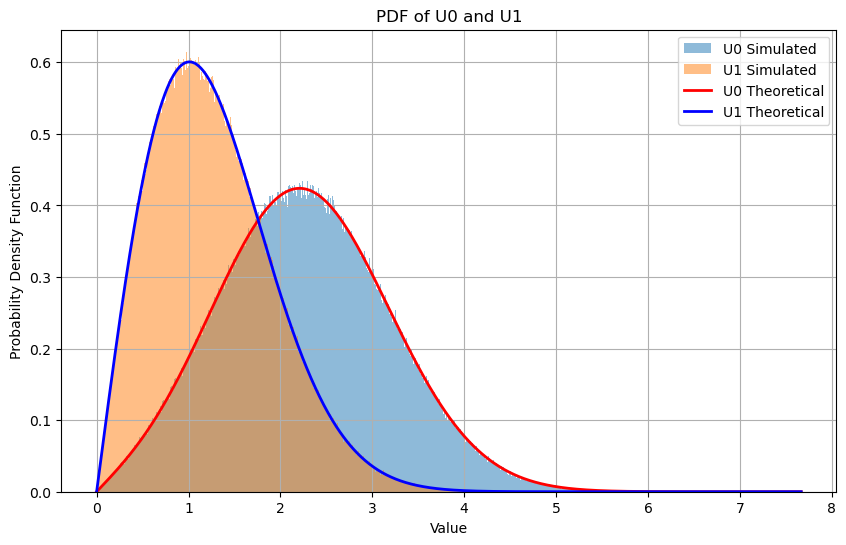

In [6]:
# Define range for x-axis based on simulated data
x_min = 0
x_max = max(U0.max(), U1.max()) * 1.1  # Extend range slightly for better visualization
x_values = np.linspace(x_min, x_max, 1000)

# Plot empirical PDFs using histograms
# max_value = max(U0.max(), U1.max())
bins = np.linspace(0, x_max, 1000)

plt.figure(figsize=(10, 6))
plt.hist(U0, bins=bins, density=True, alpha=0.5, label='U0 Simulated')
plt.hist(U1, bins=bins, density=True, alpha=0.5, label='U1 Simulated')



# To compute theoretical PDFs over x_values using manual implementation

def rician_pdf(r, s, sigma_v2):
    return (r / sigma_v2) * np.exp(-(r**2 + s**2) / (2 * sigma_v2)) * i0((r * s) / sigma_v2)

# Compute s parameters for U0 and U1
s_U0 = np.abs(2 * alpha * E)  # Signal amplitude for U0
s_U1 = np.abs(2 * alpha * E * rho)  # Signal amplitude for U1

sigma_v2 = sigma_v_squared  # Variance of the noise

# Compute theoretical PDFs over x_values
theoretical_p_U0 = rician_pdf(x_values, s_U0, sigma_v2)
theoretical_p_U1 = rician_pdf(x_values, s_U1, sigma_v2)

# Plot theoretical PDFs
plt.plot(x_values, theoretical_p_U0, 'r-', lw=2, label='U0 Theoretical')
plt.plot(x_values, theoretical_p_U1, 'b-', lw=2, label='U1 Theoretical')

plt.xlabel('Value')
plt.ylabel('Probability Density Function')
plt.title('PDF of U0 and U1')
plt.legend()
plt.grid(True)
plt.show()

#### Empirical vs. Theoretical $P_E$

In [7]:
# Estimate empirical P_E
P_E_empirical = np.mean(U1 > U0)

# Compute Theoretical P_E using the closed-form expression 

# Define x and w as per the closed-form expression
sqrt_term = np.sqrt(1 - np.abs(rho)**2)
x = np.sqrt((alpha**2 * E) / sigma_z_squared * (1 - sqrt_term))
w = np.sqrt((alpha**2 * E) / sigma_z_squared * (1 + sqrt_term))

# Compute the Marcum Q function Q_1(x, w)
# Note: scipy.special.marcumq(m, a, b) computes Q_m(a, b)
Q_1_xw = marcumq(1, x, w)

# Compute the modified Bessel function I0(xw)
I0_xw = i0(x * w)

# Compute the exponential term
exp_term = np.exp(-(x**2 + w**2) / 2)

# Compute theoretical P_E
P_E_theoretical = Q_1_xw - 0.5 * exp_term * I0_xw

# Display results
print(f"Theoretical P_E: {P_E_theoretical:.6f}")
print(f"Empirical P_E:   {P_E_empirical:.6f}")

Theoretical P_E: 0.185324
Empirical P_E:   0.187643


#### $P_E$ as A Function of SNR

In [8]:
# Set random seed for reproducibility
np.random.seed(13)

# System Parameters 
alpha = 1.0        # Scaling factor
rho = 0.1            # Correlation coefficient (0 <= |rho| <= 1)

# Noise variance
sigma_z_squared = 1.0  # Noise variance (fixed)

# Simulation Parameters
num_simulations = int(1e7)  # Number of Monte Carlo simulations per SNR point

# SNR Parameters 
SNR_dB_range = np.arange(0, 10, 1)  # SNR in dB

# Initialize arrays to store theoretical and empirical P_E
P_E_theoretical_array = []
P_E_empirical_array = []

# Loop over each SNR value
for SNR_dB in SNR_dB_range:
    # Convert SNR from dB to linear scale
    SNR_linear = 10**(SNR_dB / 10)
    
    # Compute energy E based on SNR: SNR = E / sigma_z_squared => E = SNR * sigma_z_squared
    E = SNR_linear * sigma_z_squared
    
    # Theoretical P_E Calculation 
    
    # Compute sqrt_term = sqrt(1 - |rho|^2)
    sqrt_term = np.sqrt(1 - np.abs(rho)**2)
    
    # Compute x and w as per the closed-form expression
    x = np.sqrt((alpha**2 * E) / sigma_z_squared * (1 - sqrt_term))
    w = np.sqrt((alpha**2 * E) / sigma_z_squared * (1 + sqrt_term))
    
    # Compute the Marcum Q function 
    Q_1_xw = marcumq(1, x, w)
    
    # Compute the modified Bessel function I0(xw)
    I0_xw = i0(x * w)
    
    # Compute the exponential term
    exp_term = np.exp(-(x**2 + w**2) / 2)
    
    # Compute theoretical P_E
    P_E_theoretical = Q_1_xw - 0.5 * exp_term * I0_xw
    P_E_theoretical_array.append(P_E_theoretical)
    
    # Monte Carlo Simulation 
    
    # Generate complex Gaussian noise N0 and N1
    # Each component (real and imaginary) has variance sigma_z_squared * E
    N0_real = np.random.normal(0, np.sqrt(sigma_z_squared * E), num_simulations)
    N0_imag = np.random.normal(0, np.sqrt(sigma_z_squared * E), num_simulations)
    N0 = N0_real + 1j * N0_imag
    
    N1_real = np.random.normal(0, np.sqrt(sigma_z_squared * E), num_simulations)
    N1_imag = np.random.normal(0, np.sqrt(sigma_z_squared * E), num_simulations)
    N1 = N1_real + 1j * N1_imag
    
    # Compute U0 and U1
    U0 = np.abs(2 * alpha * E + N0)
    U1 = np.abs(2 * alpha * E * rho + N1)
    
    # Estimate empirical P_E
    P_E_empirical = np.mean(U1 > U0)
    P_E_empirical_array.append(P_E_empirical)
    
    # === Optional: Print Progress ===
    print(f"SNR: {SNR_dB} dB | Theoretical P_E: {P_E_theoretical:.6f} | Empirical P_E: {P_E_empirical:.6f}")



SNR: 0 dB | Theoretical P_E: 0.185324 | Empirical P_E: 0.187374
SNR: 1 dB | Theoretical P_E: 0.143442 | Empirical P_E: 0.146042
SNR: 2 dB | Theoretical P_E: 0.103948 | Empirical P_E: 0.106767
SNR: 3 dB | Theoretical P_E: 0.069352 | Empirical P_E: 0.071942
SNR: 4 dB | Theoretical P_E: 0.041716 | Empirical P_E: 0.044155
SNR: 5 dB | Theoretical P_E: 0.022038 | Empirical P_E: 0.023970
SNR: 6 dB | Theoretical P_E: 0.009897 | Empirical P_E: 0.011247
SNR: 7 dB | Theoretical P_E: 0.003628 | Empirical P_E: 0.004343
SNR: 8 dB | Theoretical P_E: 0.001033 | Empirical P_E: 0.001357
SNR: 9 dB | Theoretical P_E: 0.000214 | Empirical P_E: 0.000328


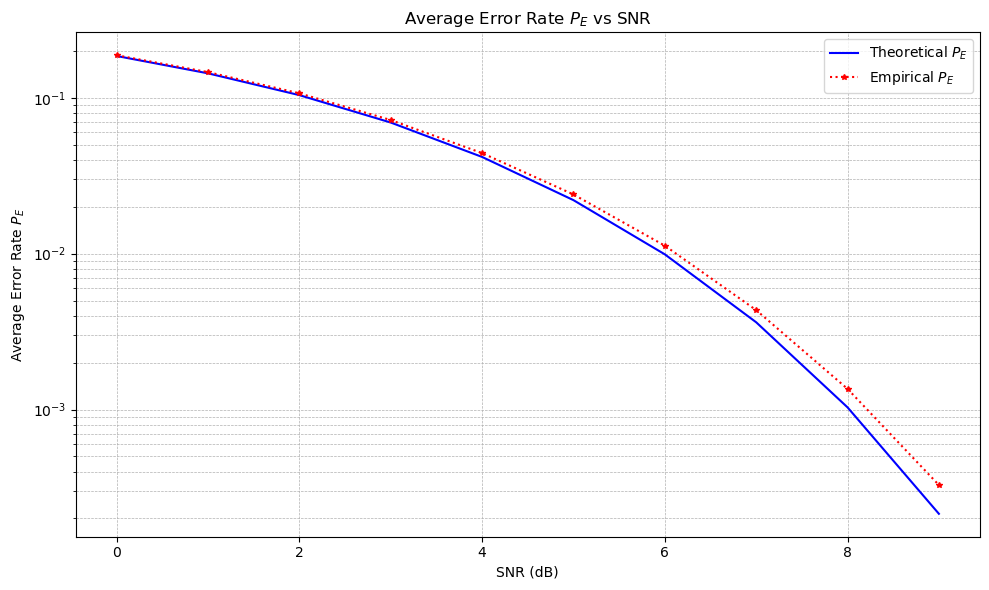

In [9]:
# Ensure all entries are valid numbers by filtering out None or invalid entries
P_E_theoretical_array = np.array([val for val in P_E_theoretical_array if isinstance(val, (int, float))])
P_E_empirical_array = np.array([val for val in P_E_empirical_array if isinstance(val, (int, float))])

# Plot the theoretical and empirical P_E vs SNR
plt.figure(figsize=(10, 6))
plt.semilogy(SNR_dB_range, P_E_theoretical_array, 'b-', label='Theoretical $P_E$')
plt.semilogy(SNR_dB_range, P_E_empirical_array, 'r*:', markersize=4, label='Empirical $P_E$')
plt.title('Average Error Rate $P_E$ vs SNR')
plt.xlabel('SNR (dB)')
plt.ylabel('Average Error Rate $P_E$')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

### Matlab Example
- [Detection of Known Signals with Coherent and Non-Coherent Receivers](https://www.mathworks.com/help/phased/ug/detection-of-known-signals-with-coherent-and-non-coherent-receivers.html)
